In [15]:
# Importerer
import numpy as np
import matplotlib.pyplot as plt
import imageio

Eksplisitt skjema:
\begin{align}
  u^{n+1}_{i,j} =  u^n_{i,j} + \frac{\Delta t}{\Delta x^2}
                                               (u^n_{i+1,j} +
                                               u^n_{i-1,j} +
                                               u^n_{i,j+1} +
                                               u^n_{i,j-1} -4 
                                               u^n_{i,j}) - \Delta th_{i,j}
\end{align}

Setter $\alpha =\frac{\Delta t}{\Delta x^2}$

$$
\Rightarrow \begin{align}
  u^{n+1}_{i,j} =  u^n_{i,j} + \alpha
                                               (u^n_{i+1,j} +
                                               u^n_{i-1,j} +
                                               u^n_{i,j+1} +
                                               u^n_{i,j-1} -4 
                                               u^n_{i,j}) - \Delta th_{i,j}
\end{align}
$$


In [6]:
u=np.ones((70, 100))
alpha=0.25
N=1000
for i in range(N):
    u[1:-1, 1:-1]+=alpha*(u[:-2, 1:-1]+
                          u[2:, 1:-1]+
                          u[1:-1, :-2]+
                          u[1:-1, 2:]-
                          4*u[1:-1, 1:-1])

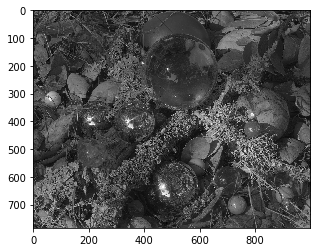

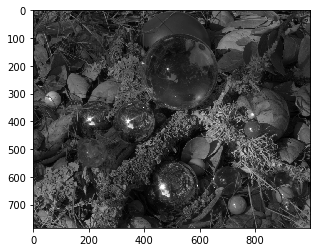

In [94]:
orig_im = imageio.imread('..\hdr-bilder\Balls\Balls_00032.png') 
grey_im =  orig_im.astype(float).sum(2) / (255 * 3)
orig_grey_im = orig_im.astype(float).sum(2) / (255 * 3)

alpha = .25                     # dt / dx**2
k = 1.1
for i in range(10):
    laplace = (grey_im[0:-2, 1:-1] +
               grey_im[2:, 1:-1] +
               grey_im[1:-1, 0:-2] +
               grey_im[1:-1, 2:] -
               4 * grey_im[1:-1, 1:-1])
    const = k * (grey_im[0:-2, 1:-1] +
               grey_im[2:, 1:-1] +
               grey_im[1:-1, 0:-2] +
               grey_im[1:-1, 2:] -
               4 * grey_im[1:-1, 1:-1])
    grey_im[1:-1, 1:-1] += (alpha * laplace - alpha * const)
    grey_im[:, 0] = grey_im[:, 1]      # Neumann randbetingelse
    grey_im[:, -1] = grey_im[:, -2]    #
    grey_im[0, :] = grey_im[1, :]      #
    grey_im[-1, :] = grey_im[-2 , :]   #

for i in range(len(grey_im)):
    for j in range(len(grey_im[0])):
        if grey_im[i][j] > 1:
            grey_im[i][j] = 0.85
        elif grey_im[i][j] < 0:
            grey_im[i][j] = 0
    
plt.imshow(grey_im, plt.cm.gray)
plt.show()
plt.imshow(orig_grey_im, plt.cm.gray)